In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
from myutil import *

# Project : Stock market analysis and prediction
Jeroen Le Maire --- A network tour of data science

This project aims to check if it is possible to discover ouperforming stocks by machine learning. The data is from Professer Milosevic from the university from Manchester. I got in contact with him because of this project. The data contains 1739 stocks and quarterly data over a period from 2012 to 2015. Furthermore it contains about 20 features for every data point.
The data was formated in a kind of flash cards, so it took a while to reformat them correctly.

## 1. Load the data

In [2]:
df = load_data()
#Shows which percentage of the data is loaded (long load time)

0.0
11.36385158809826
22.72770317619652
34.09155476429478
45.45540635239304
56.8192579404913
68.18310952858955
79.54696111668781
90.91081270478608
100


A quick view to check if everything is ok.

In [3]:
df.iloc[0:10,:]

,Name,Date,CUR_MKT_CAP,PXnow,PX1YR,DIVIDENDY,BEST_EPS,EPS_GROWTH,Sales_growth,PE,fiveyrAvPriceEarnings,Pricebook,Pricesales,CURratio,Quick,DebtEQ,Rating,Prof_margin,oper_margin,assetTurnover
0,A UN Equity,NaN,NaN,NaN,29.2757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A UN Equity,NaN,15472.8,31.8285,30.0122,0.3142,4.295,25.8621,3.3393,9.4925,14.8595,2.3457,1.6308,3.2752,2.6185,46.0741,4.875,14.7144,17.311,0.7515
2,A UN Equity,29/06/2012,13635.9347,28.06,30.5771,0.7128,4.75,-26.3158,1.8924,9.1789,13.0287,2.0109,1.431,2.0148,1.3746,45.434,4.882,14.1033,15.6703,0.7368
3,A UN Equity,28/09/2012,13397.6378,27.4951,36.6482,1.4548,4.2,46.988,2.2569,7.9493,12.1619,1.8358,1.3952,2.4453,1.7295,45.5545,4.895,24.0521,15.7329,0.7
4,A UN Equity,31/12/2012,14244.4388,29.2757,40.8958,1.3663,3.98,-21.2121,2.7523,8.9409,12.4997,1.8995,1.4748,2.5525,1.8007,44.1226,4.882,10.6548,12.9167,0.699
5,A UN Equity,28/03/2013,14570.2759,30.0122,39.9877,1.7326,3.7,-34.2466,-0.0577,9.5532,12.4754,1.9518,1.5089,2.5252,1.8003,44.3858,4.7,9.5843,12.2979,0.6902
6,A UN Equity,28/06/2013,14729.7956,30.5771,41.0746,1.766,4.09,-28.5714,-4.1207,10.2251,12.951,2.1143,1.5433,2.9574,2.0677,56.3883,4.579,10.1695,14.2857,0.6819
7,A UN Equity,30/09/2013,16953.0896,36.6482,40.7456,1.2552,4.115,-47.541,-2.7731,15.4391,14.7228,2.3087,1.8393,3.1105,2.231,51.0304,4.778,12.2817,16.5891,0.6391
8,A UN Equity,31/12/2013,18976.1282,40.8958,40.94,1.2031,4.057,-28.8462,-40,18.2048,17.8189,2.509,2.2581,3.275,2.3183,49.4768,4.667,19.3452,12.3016,0.574
9,A UN Equity,31/03/2014,18644.8762,39.9877,41.55,1.2604,3.95,-75,-42.9561,22.7455,21.2314,2.3668,2.4903,3.128,2.2414,47.8415,4.692,14.0688,9.5142,0.4966


## 2. Clean the data 
First the data points are deleted for which it is impossible the calculate the future return. Those can be divided in two groups. The first group is the more recent data. For them the future return is not available yet. The second group are the datapoints for which the date is unknown.
We add a column that contains the return in the next year.
A feature called 'breturn' is added. It is a binary column that contains a one if the stock will be performing really good (more than 15 %).
The incomplete data is noted as -9999. We change this to NaN for easier filtering.

In [4]:

df=df[df['PX1YR'] != 'empty']
df=df.dropna(subset=['Date'])
df['return']=(df['PX1YR'].astype(float)/df['PXnow'].astype(float)-1)
df['breturn'] = (df['return']>0.15)*1
df.iloc[0:10,:]
df=df.replace(to_replace='-9999',value=float('NaN'))
#df['DIVIDENDY'].fillna(0, inplace=True)

The feature types are transformed to floats to ensure correct calculations. The first 2 features are not tranformed because they contain the name and date.
The intermediary data frame is saved as well.
With the describe option we get a quick overview of the data. The percentiles are not correct as there are still some incomplete data points. In the next part only the complete data will be used.

In [5]:
df,attributes = columnstofloat(df)

import os.path
df.to_csv(os.path.join('df.csv'))

In [6]:
df.loc[:,attributes].describe().astype(float)

C:\Users\Jeroe\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CUR_MKT_CAP,PXnow,PX1YR,DIVIDENDY,BEST_EPS,EPS_GROWTH,Sales_growth,PE,fiveyrAvPriceEarnings,Pricebook,Pricesales,CURratio,Quick,DebtEQ,Rating,Prof_margin,oper_margin,assetTurnover,return,breturn
count,1.650000e+04,16453.000000,16982.000000,9518.000000,14151.000000,14334.000000,15365.000000,13471.000000,12666.000000,14120.000000,14112.000000,12265.000000,12265.000000,14710.000000,16514.000000,14908.000000,14878.000000,14422.000000,17600.000000,17600.000000
mean,1.703872e+05,359.456248,424.790391,2.007120,19.581739,68.616251,14.045440,40.186552,29.694856,8.574161,3.302338,1.988559,1.304729,172.121549,3.766162,0.091711,9.257534,0.772832,0.168684,0.493807
std,7.692068e+05,1195.496974,1500.420915,3.303404,68.958320,1451.354254,139.714338,205.690963,98.387869,211.896594,47.350949,2.019026,1.845391,835.996715,0.622679,542.134746,159.391942,0.700797,0.414809,0.499976
min,3.998060e+01,0.036700,0.043500,0.000000,-57.300000,-32788.888900,-314.150900,0.036200,0.366300,0.111600,0.012600,0.000000,0.000000,0.000000,1.000000,-60687.471000,-9791.930800,-0.087900,-1.195420,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145885,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330797,1.000000
max,2.213614e+07,43400.000000,55560.000000,101.672200,1440.159000,100100.000000,6732.291700,10582.335700,2857.352000,15072.373300,3802.634200,69.114900,69.114900,34463.636400,5.000000,7514.559800,497.914200,10.464200,7.817914,1.000000


Let's calculate the percentage of data points that have a positive return after 1 year.

In [7]:
#Percent of companies whos stock price increases
df[df['return'] > 0].shape[0]/df.shape[0]*100
#In the last column we see that the average return is 16.86 %

71.93181818181819

As the data contained some outliers, we want to remove these. In some cases, the values are impossibly high. In other cases, they just happen very rare, so you can't get conclusions from that. The z-score is used to delete some data points. In this way, the plots are clearer.

In [8]:
df = remove_outliers(df)

## 3. Basic data analysis and visualisation
The PE ratio is one of the most important ratio's in fundamental analysis, let's try to find a relation between the PE (price/earnings) ratio and the return of a share.  Therefore we split the data into different classes based on their PE value. For each class the average return is calculated. Normally the lower the PE ratio, the higher should be the return. The plot is confirming this. 
Note: The low values fluctuate a lot as there are fewer data points.

In [31]:
bins = [5,6,7,8,9,10,12,14,16,18,20,25,30,35,40,1000]
labels = [x+0.5 for x in bins[0:15]]
df['bin']=pd.cut(df['PE'],bins,labels=labels)

     CUR_MKT_CAP
bin             
5.5           15
6.5           27
7.5           49
8.5           88
9.5          106


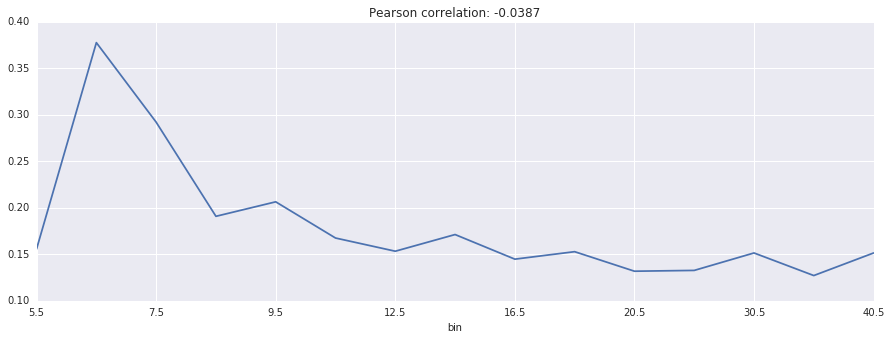

In [33]:
group = df.groupby('bin').mean()
counter = df.groupby('bin').count()
print(counter.iloc[:5,:1])
corr = df['return'].corr(df['bin'], method='pearson')
group['return'].plot(grid=True, title='Pearson correlation: {:.4f}'.format(corr), figsize=(15,5));
df['BEST_EPS']=df['BEST_EPS']/df['PXnow']


We've seen the correlation between the PE and the return let's check the correlations between the different features and the returns. The next plot shows a dot for every data point. The y-axis shows the return, while the x-axis shows the features. In each plot a stright line is added, it shows the value of the correlation between the features.

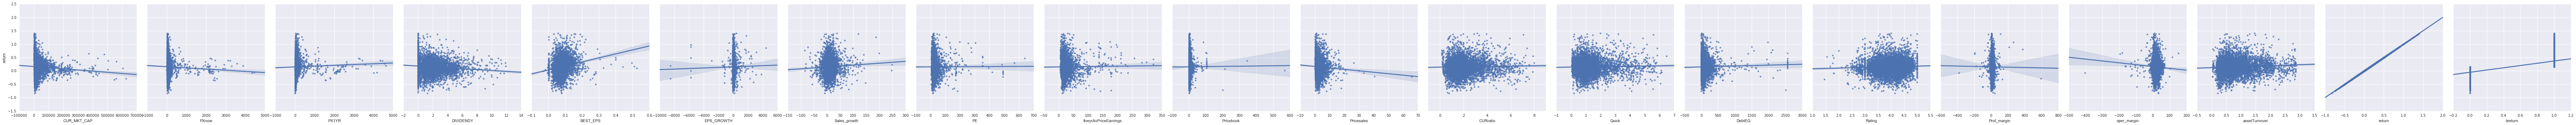

In [11]:
import seaborn as sns
x = attributes
y = ['return']
sns.pairplot(df, hue=None, hue_order=None, palette=None, x_vars=x, y_vars=y, kind='reg', diag_kind='hist', markers=None, size=5, aspect=1, dropna=True)


## Conclusions and interpretation of some of the plots
Here, two plots are described and interpreted.
**Current market capitalization** Some of the smallcaps have higher returns, but some have big losses. The spread of return is a lot higher for small companies. It proves that smallcaps have higher risks. The regression line shows the negative correlation between the return and de market capitalization.

**BEST EPS** The scatter plot is not that clear, but the regression line shows that there is a relation between the best EPS value and the return. Note that I divided the EPS by the price of the share to make it like a ratio. In fact, it is becoming the "BEST EP", an inverse of the BEST PE.

This is an interactive plot that shows the market capitalization, the BEST EP ratio and the returns for every data point. The color of the dot shows the dividend. The higher the dividend, the greener the dot. In fact, these plots are the same as the ones above, but interactive.

In [12]:
output_notebook()
bokehplot(df)

Loading BokehJS ...

In the first analysis NaN values don't do any harm as these values are neglected. For further calculations it is important to delete these data as it is influencing the results. Now the data can be summarized and we can do a first check.

In [14]:
df= df.iloc[:,2:].reset_index(drop=True)
df=df.dropna()                               #Tot hiervoor konden de enkele NA's geen kwaad, maar voor het NN willen we dat niet
df.loc[:,attributes].describe().astype(np.float)

,CUR_MKT_CAP,PXnow,PX1YR,DIVIDENDY,BEST_EPS,EPS_GROWTH,Sales_growth,PE,fiveyrAvPriceEarnings,Pricebook,Pricesales,CURratio,Quick,DebtEQ,Rating,Prof_margin,oper_margin,assetTurnover,return,breturn
count,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000,5549.000000
mean,24223.183024,91.816200,102.887837,1.736713,0.077426,22.588672,7.309742,25.055014,23.384719,4.694617,2.453699,1.940756,1.225409,99.022084,3.930807,10.325047,15.731832,0.843654,0.151882,0.486214
std,47042.799294,255.627182,280.646720,1.752427,0.035220,313.096212,18.039976,31.261978,21.701677,11.901145,2.492265,1.209221,0.982652,183.544575,0.518267,17.722974,15.811613,0.539859,0.280525,0.499855
min,969.982300,1.850000,2.440000,0.000000,-0.030581,-8520.689700,-85.940300,2.103400,4.806800,0.363700,0.128700,0.146300,0.034500,0.000000,1.444000,-385.164800,-404.120900,0.026000,-0.837658,0.000000
25%,4888.997400,34.030000,36.920000,0.000000,0.058837,-11.111100,-0.573100,15.119100,14.833900,1.930700,1.103900,1.125600,0.606700,31.370000,3.583000,4.894900,8.812900,0.449400,-0.011496,0.000000
50%,9459.449900,51.210000,57.270000,1.465300,0.071962,9.375000,4.995900,19.130900,18.517900,3.054900,1.810000,1.626800,0.957000,60.668200,4.000000,8.801400,14.260400,0.699900,0.140897,0.000000
75%,21412.941000,76.070000,86.390000,2.625500,0.090429,30.952400,12.223100,24.751000,23.888600,4.687300,2.943100,2.371300,1.487900,108.876600,4.316000,14.436600,21.895200,1.090300,0.303649,1.000000
max,625493.531500,4441.500000,4626.500000,11.879000,0.526175,4422.329000,248.562900,639.000800,321.366100,569.648300,65.878800,7.989400,6.486300,2563.768100,5.000000,590.006600,150.704200,2.866800,1.402414,1.000000


It is possible to find some conclusions with the 'correlation plots'. Although, it is better the have a numerical value. To calculate the correlation coefficients, the data should be normalised. We see that the dividend, market capitalization, sales growth and best EP have the biggest correlation with the return.

In [15]:
print_correlation_return(df,attributes)


DIVIDENDY -0.104225575413
CUR_MKT_CAP -0.0720714047831
Pricesales -0.0482633624651
PXnow -0.0400802070805
oper_margin -0.0389658987233
Prof_margin -0.00435273379013
PE 0.00295107421611
Pricebook 0.00325980783593
fiveyrAvPriceEarnings 0.0100711755587
EPS_GROWTH 0.0117654999064
DebtEQ 0.021673495901
CURratio 0.0268171530037
Quick 0.027724935736
PX1YR 0.0292110084654
Sales_growth 0.0447181953908
Rating 0.0460916895817
assetTurnover 0.0701406100772
BEST_EPS 0.18738466211


### Conclusions:



The right columns of the data are splitted in training data and test data and the input is separated from the labels. A permutation puts the data in random order.

In [16]:
# Training and testing sets.
x_test,x_train,y_test1,y_test2,y_train1,y_train2 = split_and_permute(df,attributes,550,5000)


Split: 550 testing and 4999 training samples
[ 315 3023 5528 ..., 1024  263  191]


The data is normalised. Note that the normalization of along the data is out commented. After some classification runs, I noticed that the performance increases if I only normalise along the features.

In [20]:
#Normalise along each dimension
x_test_orig = x_test.copy() # This variable is later used for checking the performance of the classifier
x_test -= x_test.mean(axis=0)
x_test /= x_test.std(axis=0)
x_train -= x_test.mean(axis=0)
x_train /= x_test.std(axis=0)


#Normalise along each data
#x_test = x_test.div(np.square(x_test).sum(axis=1),axis=0)
#x_train = x_train.div(np.square(x_train).sum(axis=1),axis=0)



To make sure everything is right, the data is reindexed. The last part of this notebook contains a neural network. That part requires to be run in the docker container with tensorflow. To make this notebook runnable, the data is stored in files.
There are two sets of labels, label1 (y_test1 and y_train1) contain the actual value of the return. Label2 is binary. A one means the the stock will increase more than 15%.

In [21]:
x_test_orig.reset_index(drop=True)
x_test.reset_index(drop=True)
x_train.reset_index(drop=True)
y_test1.reset_index(drop=True)
y_test2.reset_index(drop=True)
y_train1.reset_index(drop=True)
y_train2.reset_index(drop=True)


np.save('x_test',x_test)
np.save('x_train',x_train)
np.save('y_test1',y_test1)
np.save('y_test2',y_test2)
np.save('y_train1',y_train1)
np.save('y_train2',y_train2)

#x_test.to_csv(os.path.join('x_test.csv'))
#x_train.to_csv(os.path.join('x_train.csv'))

#y_test1.to_csv(os.path.join('y_test1.csv'))
#y_test2.to_csv(os.path.join('y_test2.csv'))

#y_train1.to_csv(os.path.join('y_train1.csv'))
#y_train2.to_csv(os.path.join('y_train2.csv'))


## Linear classification

Two different classifiers are tested, the linear SVM and Logistic regression. In the rest of this notebook, the performance of the Logistic classifier is analysed because it performs slightly better and it commonly used for binary classification. (label2)

In [22]:
test_pred = classifiers(x_test,x_train,y_test2,y_train2)

336.0
317.0
Train accuracy:      54.40 53.76
Test accuracy:       52.28 52.46


The classifiers don't reach high accuracies which means that it is hard to predict which stocks will perform better.

In [23]:
res = np.matrix([test_pred,y_test2])

In [24]:
false_positive =0
false_negative=0
for i in range(0,res.shape[1]):
    if (res[0,i] != res[1,i]) and (res[0,i] != 0):
        false_positive+=1
    elif (res[0,i] != res[1,i]) and (res[0,i] == 0):
        false_negative+=1
    
print('There were ',false_positive, ' false positives and ',false_negative,'false_negatives')    
        

There were  157  false positives and  104 false_negatives


In [25]:
res.sum(axis=1)

matrix([[ 317.],
        [ 264.]])

The next bokehplot shows 3 features and the stocks that will have higher returns according to the classifier are marked green. As you can see, most of the data points with high returns are detected. The plot with the Dividend shows that it is the main feature for classification. Almost all data points below a certain treshhold are marked green. 

In [26]:
output_notebook()

bokehplot2(x_test_orig,y_test1,test_pred)

Loading BokehJS ...

As mentioned before, the performance of the classifier isn't really good. Let's imagine that we would have bought the stocks that are detected by the classifier. The first box shows the average return of all the test data. The second box shows the average return of the stocks that were detected by the algorithm. It is outperforming the 'market' with 3 percent. So that seems quiet ok.

In [27]:
y_test1.mean()

0.152440195352314

In [28]:
y_test1[test_pred==1].mean()

0.1830607347746045

## Neural network
To use the techniques seen in the course, I implemented a three-layer neural network. The three layers are fully connected and contain 200,50 and 2 nodes. The performance is similar to the that from the classifier, although it doesn't seem to work properly. I tried a lot of different learning rates, different sizes of networks, adding dropout, adding regularization with different parameters, different loss fonctions, different amount of runs,... but the network never converged nicely. All the code is in the myutilnn.py. 

In [1]:
from myutilnn import *
trainnn()

Training data shape:  (5000, 17)
Training label shape:  (5000, 2)
Test data shape:  (550, 17)
Test label shape:  (550, 2)

Iteration i= 0 , train accuracy= 0.54 , loss= 46.0
test accuracy= 0.519999998808

Iteration i= 1000 , train accuracy= 0.44 , loss= 56.0
test accuracy= 0.509999996424

Iteration i= 2000 , train accuracy= 0.5 , loss= 50.0
test accuracy= 0.504000002146

Iteration i= 3000 , train accuracy= 0.47 , loss= 53.0
test accuracy= 0.540000003576

Iteration i= 4000 , train accuracy= 0.47 , loss= 53.0
test accuracy= 0.512000000477

Iteration i= 5000 , train accuracy= 0.4 , loss= 60.0
test accuracy= 0.522000002861

Iteration i= 6000 , train accuracy= 0.42 , loss= 58.0
test accuracy= 0.505999994278

Iteration i= 7000 , train accuracy= 0.48 , loss= 51.6279
test accuracy= 0.467999994755

Iteration i= 8000 , train accuracy= 0.43 , loss= 57.0
test accuracy= 0.530000013113

Iteration i= 9000 , train accuracy= 0.53 , loss= 47.0
test accuracy= 0.537999987602

Iteration i= 10000 , train ac

## Conclusion
The basic data analysis gave some good insights and shows that there is no 'Golden rule' to find outperforming stocks. The classifiers didn't perform very well, although it was possible to reach higher returns by using them. It is also possile to do some further optimization, adapt the classifiers, do some feature extraction,...
Concerning the Neural network, it is hard to find if there are errors in the code / data or maybe the setup of the network is wrong.
Finally, algorithms can help people with investment decisions although some human intervention is usefull.